In [1]:
import psutil
print(psutil.cpu_count())


10


✅ Data loaded — Rows: 40946, Columns: 16

📌 Data Types:
type                  float64
subtype               float64
bedroomCount          float64
province              float64
locality               object
postCode                int64
habitableSurface      float64
buildingCondition     float64
hasGarden               int64
gardenSurface         float64
hasTerrace              int64
epcScore              float64
price                 float64
hasParking              int64
region                float64
price_square_meter    float64
dtype: object

📌 Missing Values:
type                  0
subtype               0
bedroomCount          0
province              0
locality              0
postCode              0
habitableSurface      0
buildingCondition     0
hasGarden             0
gardenSurface         0
hasTerrace            0
epcScore              0
price                 0
hasParking            0
region                0
price_square_meter    0
dtype: int64

📌 Duplicate Rows: 0

📌 First 5 ro

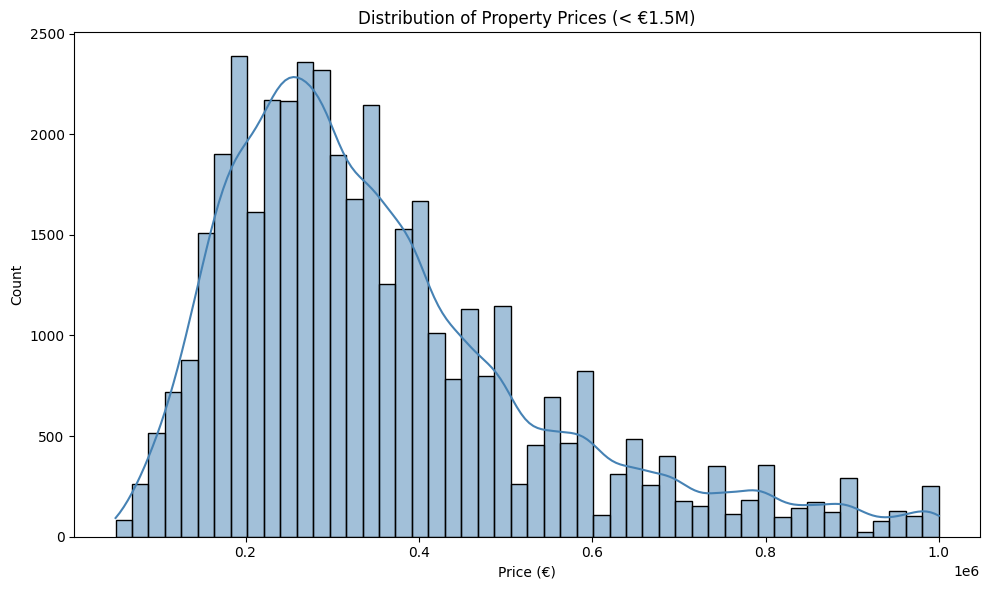

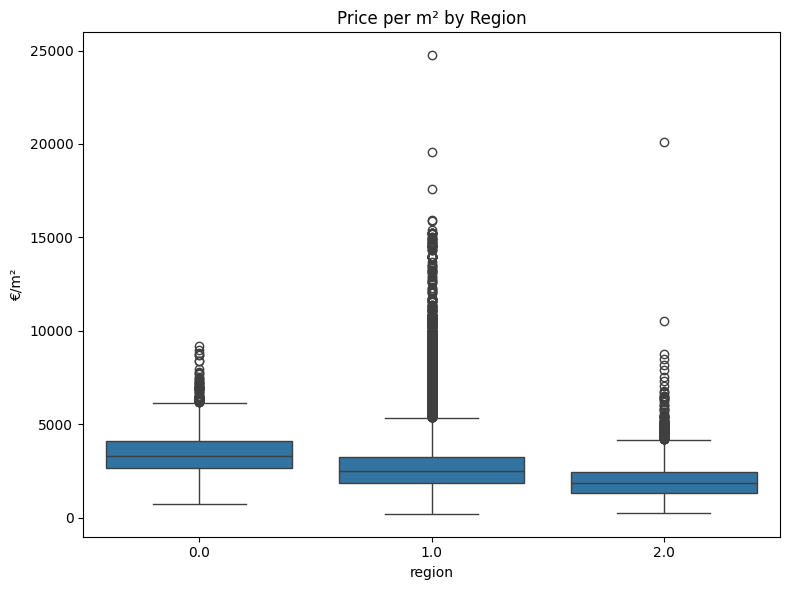

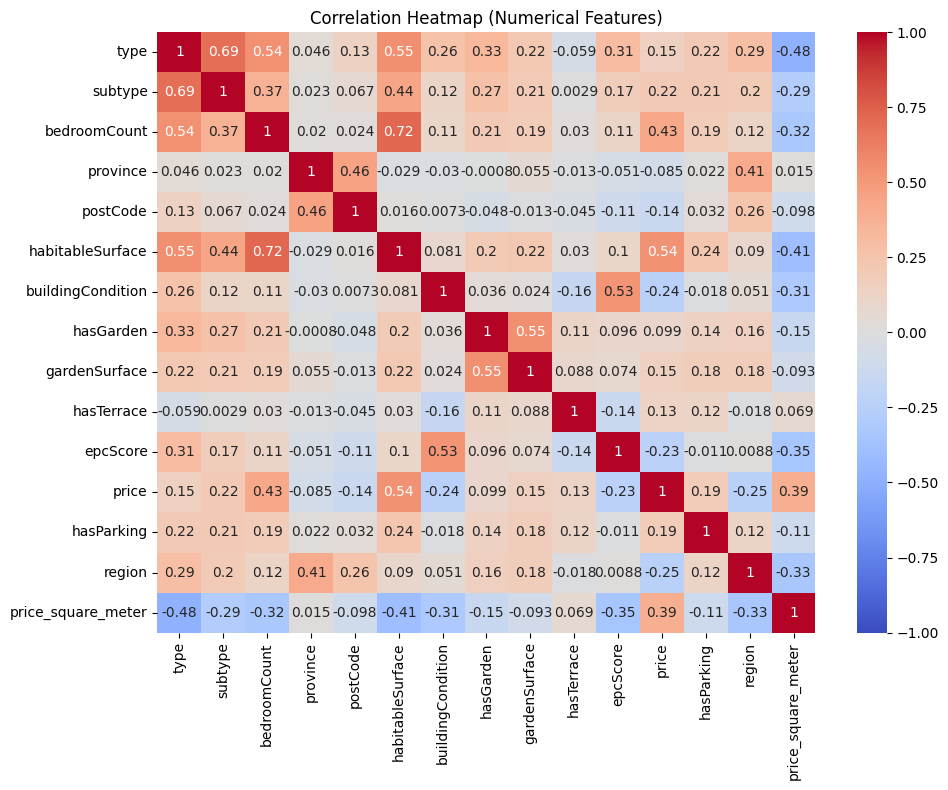

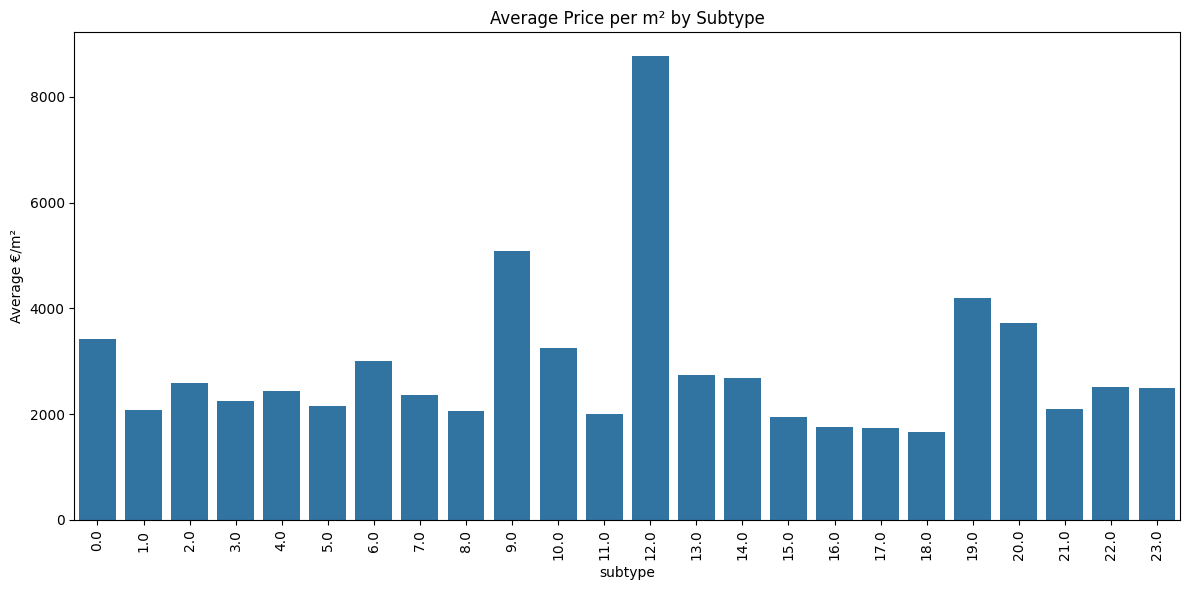

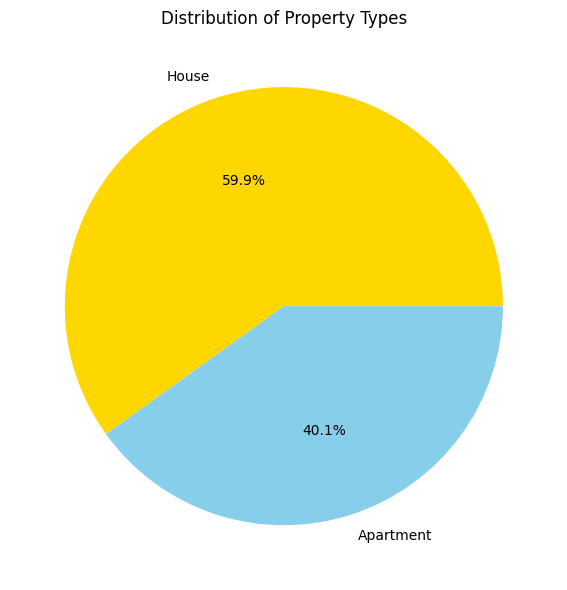

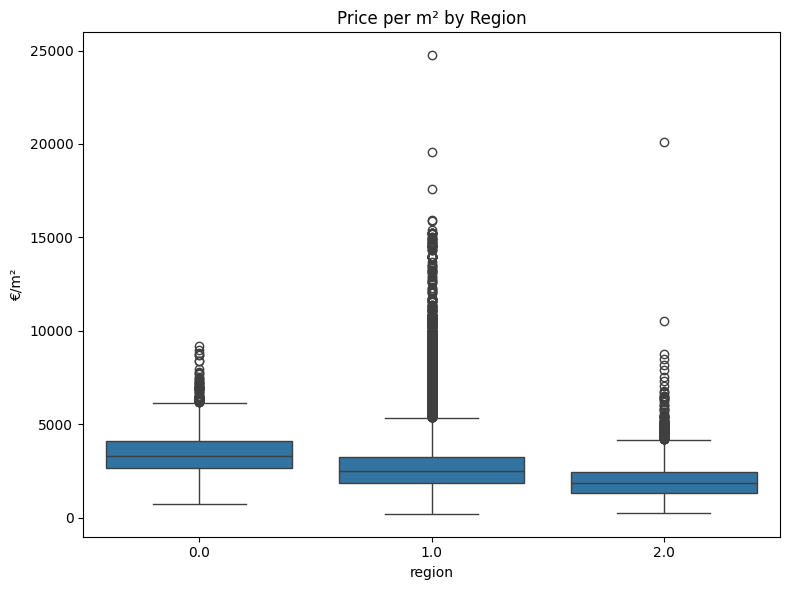

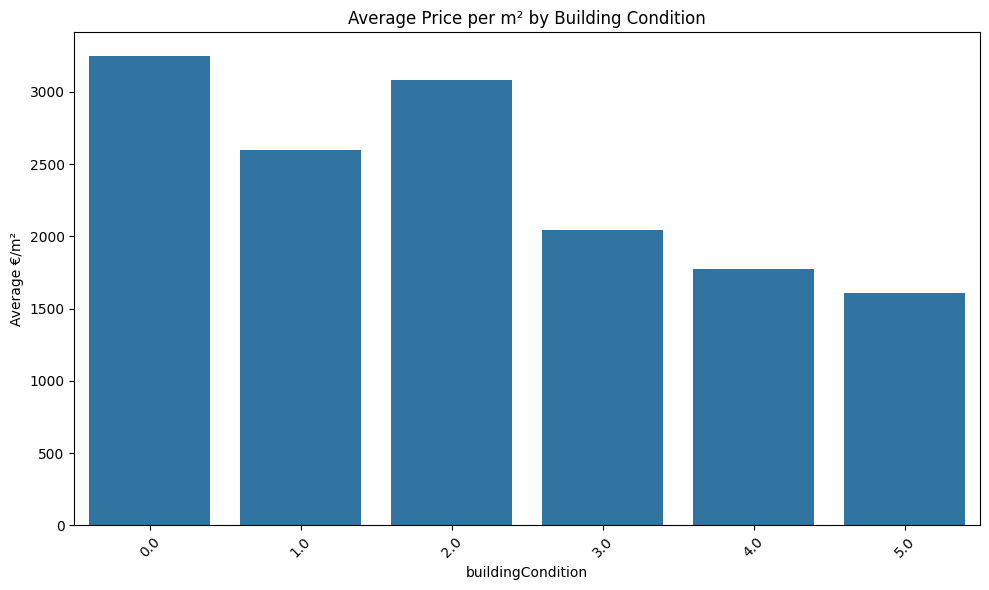

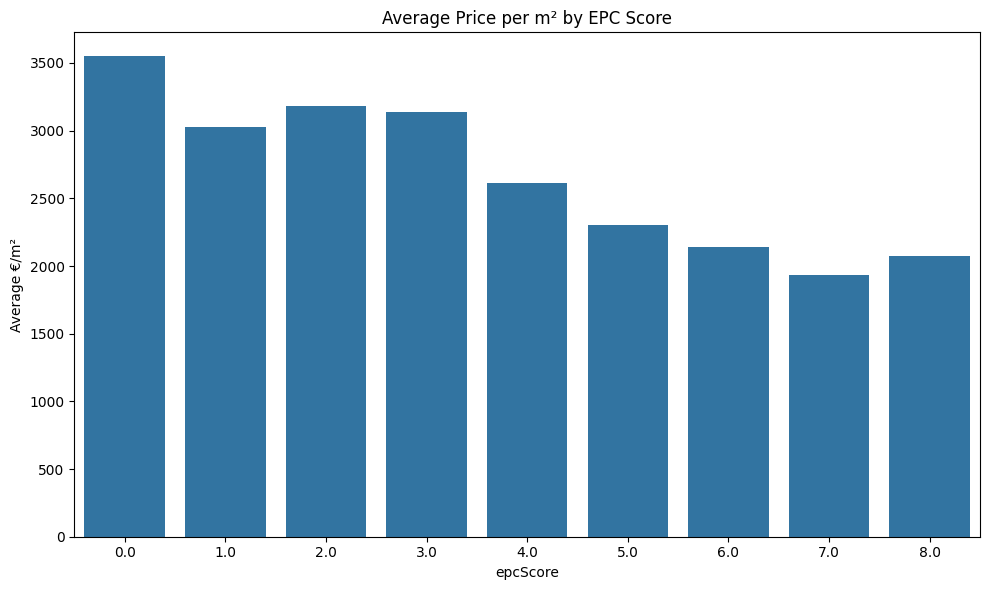


🔎 High €/m² Properties (Top Outliers):
          price  habitableSurface  price_square_meter  type  subtype  region
6386   495000.0              20.0        24750.000000   1.0     11.0     1.0
22077  321300.0              16.0        20081.250000   0.0      0.0     2.0
15389  646293.0              33.0        19584.636364   1.0     11.0     1.0
31612  299000.0              17.0        17588.235294   1.0      1.0     1.0
20155  239000.0              15.0        15933.333333   0.0     12.0     1.0
33974  795000.0              50.0        15900.000000   0.0      0.0     1.0
31647  955000.0              62.0        15403.225806   0.0      0.0     1.0
8337   899000.0              59.0        15237.288136   0.0      0.0     1.0
33636  899000.0              59.0        15237.288136   0.0      0.0     1.0
33987  899000.0              59.0        15237.288136   0.0      0.0     1.0
🔹 Average price by region:
region
0.0    421501.685801
1.0    380469.587441
2.0    287829.612685
Name: price, dty

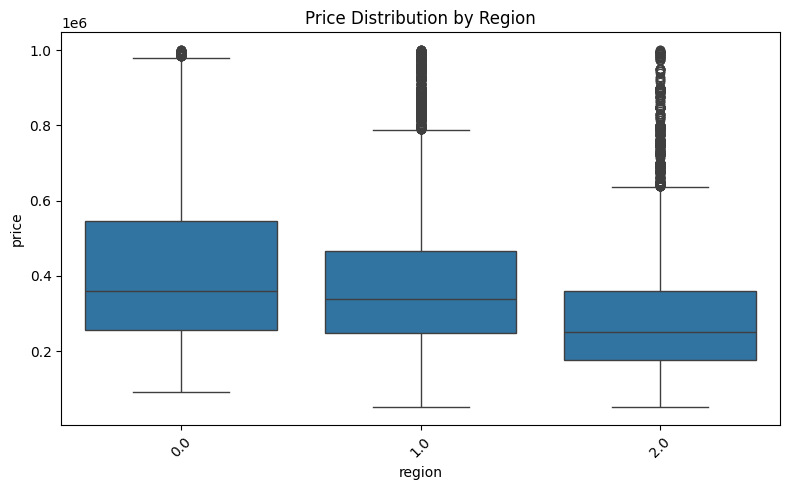

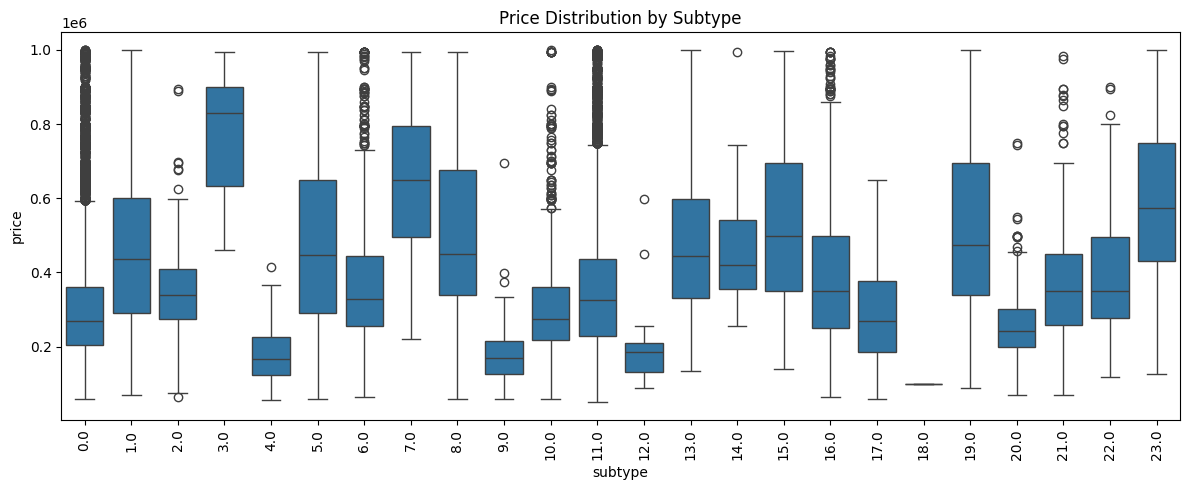


🔹 Top positively correlated categories with price:
price                1.000000
subtype              0.217127
buildingCondition   -0.242751
region              -0.245095
Name: price, dtype: float64

🔹 Top negatively correlated categories with price:
price                1.000000
subtype              0.217127
buildingCondition   -0.242751
region              -0.245095
Name: price, dtype: float64

🔍 ANOVA for region → F = 1401.71, p = 0.0000
🔍 ANOVA for subtype → F = 306.98, p = 0.0000


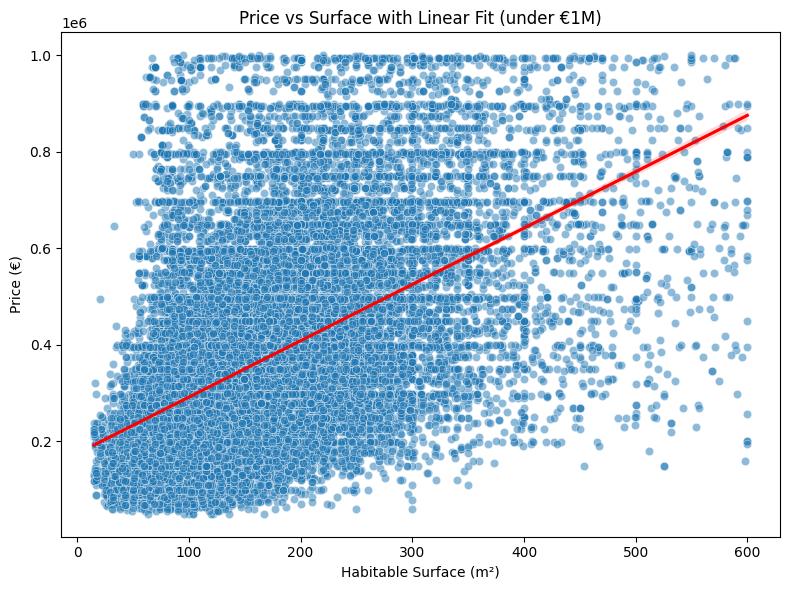

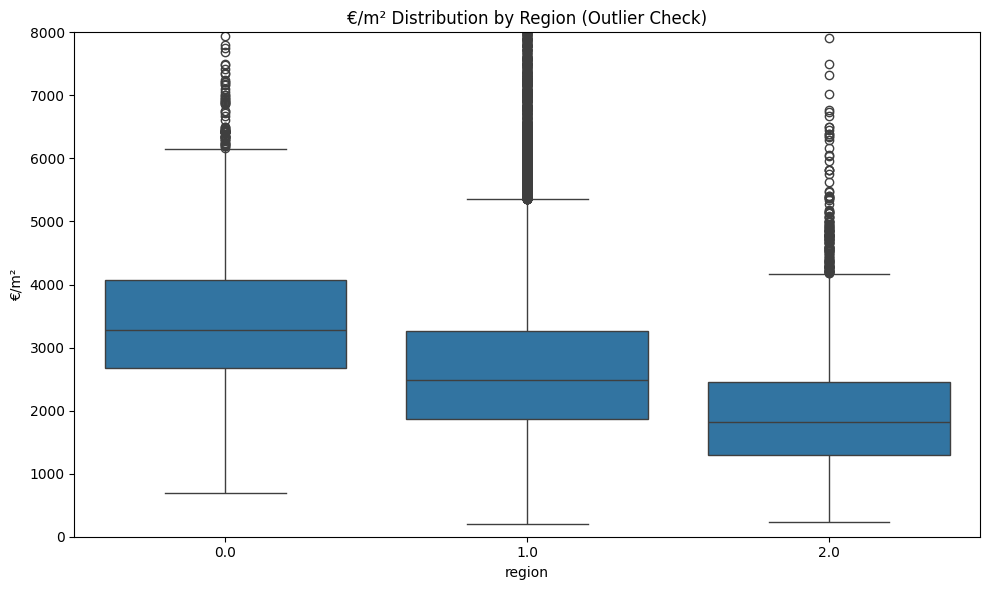

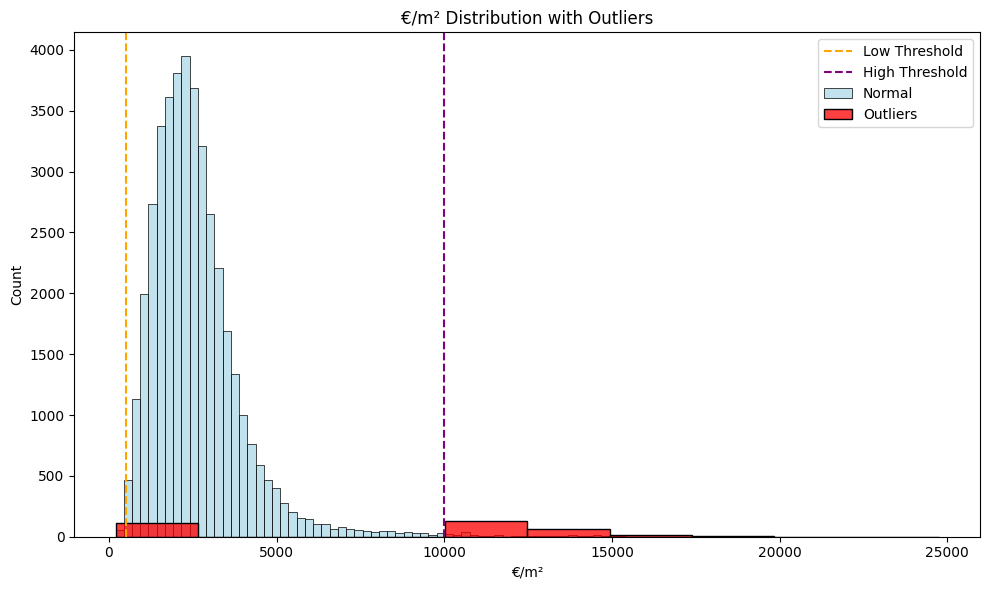

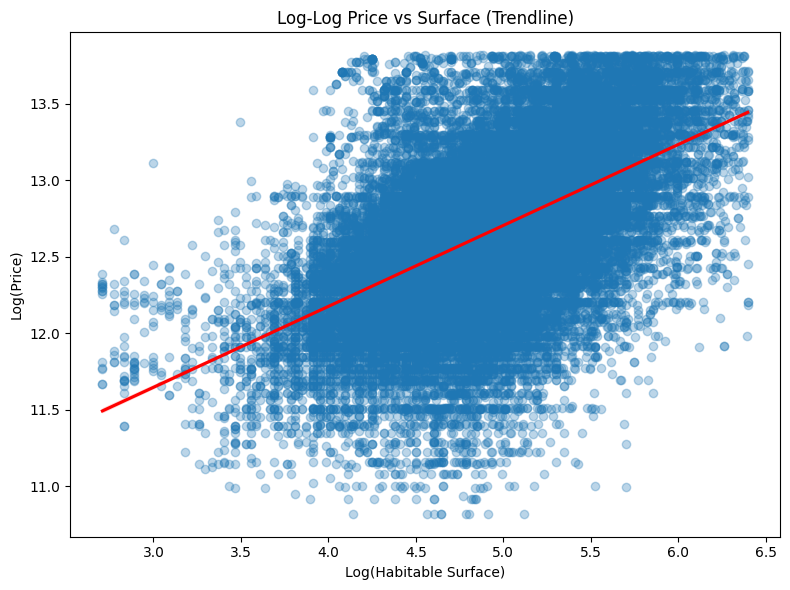

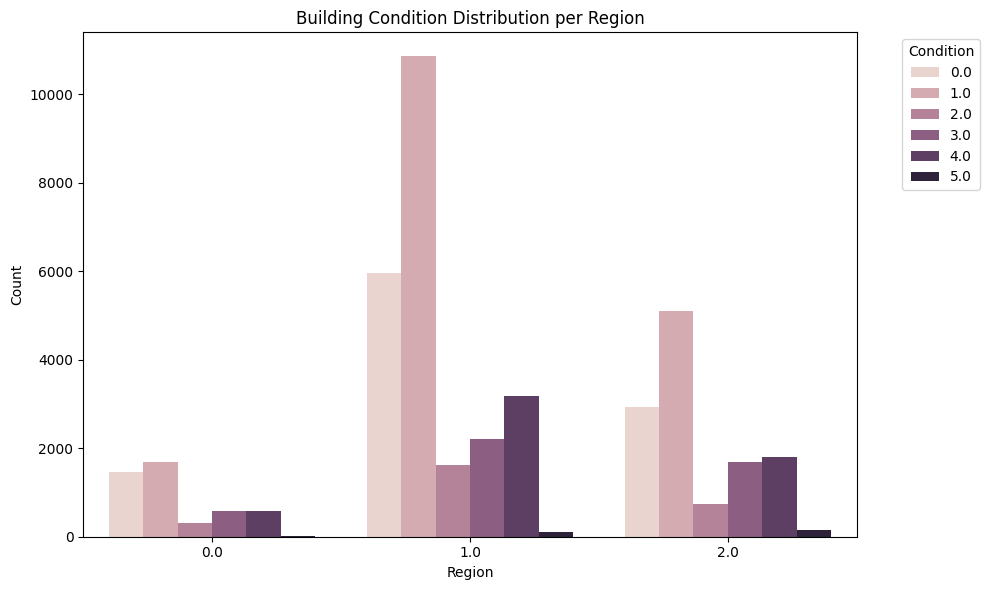


📊 EDA complete. Visuals saved to ../figures/


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import os

# Create figures directory if it doesn't exist
os.makedirs("../figures", exist_ok=True)


# === STEP 1: LOAD CLEANED DATA ===
input_path = "../data/cleaned_data_mvg.csv"
df = pd.read_csv(input_path)
print(f"✅ Data loaded — Rows: {len(df)}, Columns: {df.shape[1]}")

# === STEP 2: BASIC INFO ===
print("\n📌 Data Types:")
print(df.dtypes)

print("\n📌 Missing Values:")
print(df.isnull().sum())

print(f"\n📌 Duplicate Rows: {df.duplicated().sum()}")

print("\n📌 First 5 rows:")
print(df.head())

# === STEP 1: DISTRIBUTION OF PRICE ===
os.makedirs("../figures", exist_ok=True)

plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 1_500_000]['price'], bins=50, kde=True, color='steelblue')
plt.title("Distribution of Property Prices (< €1.5M)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../figures/eda_price_distribution.png")
plt.show()

# === STEP 2: PRICE PER M² BY REGION ===
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='region', y='price_square_meter')
plt.title("Price per m² by Region")
plt.ylabel("€/m²")
plt.tight_layout()
plt.savefig("../figures/eda_price_per_m2_by_region.png")
plt.show()

# === STEP 3: CORRELATION HEATMAP (NUMERIC FEATURES) ===
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.savefig("../figures/eda_correlation_heatmap_numerica_features.png")
plt.show()

# === STEP 4: PRICE PER M² BY PROPERTY SUBTYPE ===
plt.figure(figsize=(12, 6))
subtype_avg = df.groupby('subtype')['price_square_meter'].mean().sort_values()
sns.barplot(x=subtype_avg.index, y=subtype_avg.values)
plt.xticks(rotation=90)
plt.ylabel("Average €/m²")
plt.title("Average Price per m² by Subtype")
plt.tight_layout()
plt.savefig("../figures/eda_price_per_m2_by_subtype.png")
plt.show()

# === STEP 5: APARTMENT VS HOUSE COUNT ===
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', labels=['House', 'Apartment'], colors=['gold', 'skyblue'])
plt.title("Distribution of Property Types")
plt.ylabel("")
plt.tight_layout()
plt.savefig("../figures/eda_type_distribution.png")
plt.show()

# === STEP 6: PRICE PER M² BY REGION ===
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='region', y='price_square_meter')
plt.title("Price per m² by Region")
plt.ylabel("€/m²")
plt.tight_layout()
plt.savefig("../figures/eda_price_per_m2_by_region.png")
plt.show()

# === STEP 7: PRICE PER M² BY BUILDING CONDITION ===
plt.figure(figsize=(10, 6))
condition_avg = df.groupby('buildingCondition')['price_square_meter'].mean().sort_values()
sns.barplot(x=condition_avg.index, y=condition_avg.values)
plt.xticks(rotation=45)
plt.ylabel("Average €/m²")
plt.title("Average Price per m² by Building Condition")
plt.tight_layout()
plt.savefig("../figures/eda_price_per_m2_by_condition.png")
plt.show()

# === STEP 8: PRICE PER M² BY ENERGY LABEL (EPC) ===
plt.figure(figsize=(10, 6))
epc_avg = df.groupby('epcScore')['price_square_meter'].mean().sort_values(ascending=False)
sns.barplot(x=epc_avg.index, y=epc_avg.values)
plt.ylabel("Average €/m²")
plt.title("Average Price per m² by EPC Score")
plt.tight_layout()
plt.savefig("../figures/eda_price_per_m2_by_epc.png")
plt.show()

# === STEP 9: HIGH €/m² OUTLIERS (SMALL PROPERTIES) ===
outliers = df[df['price_square_meter'] > 7000][['price', 'habitableSurface', 'price_square_meter', 'type', 'subtype', 'region']]
print("\n🔎 High €/m² Properties (Top Outliers):")
print(outliers.sort_values(by='price_square_meter', ascending=False).head(10))

# Analyze categorical features

# === 1. Compare mean price per category ===
print("🔹 Average price by region:")
print(df.groupby('region')['price'].mean().sort_values(ascending=False))

print("\n🔹 Average price by subtype:")
print(df.groupby('subtype')['price'].mean().sort_values(ascending=False))

# === 2. Boxplots to visualise spread ===
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='region', y='price')
plt.title("Price Distribution by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../figures/price_by_region_boxplot.png")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='subtype', y='price')
plt.title("Price Distribution by Subtype")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../figures/price_by_subtype_boxplot.png")
plt.show()

# === 3. One-Hot Encoding + Correlation ===
cat_vars = ['region', 'subtype', 'buildingCondition']
dummies = pd.get_dummies(df[cat_vars], drop_first=True)
correlation_df = pd.concat([df['price'], dummies], axis=1)
correlations = correlation_df.corr()['price'].sort_values(ascending=False)

print("\n🔹 Top positively correlated categories with price:")
print(correlations.head(10))

print("\n🔹 Top negatively correlated categories with price:")
print(correlations.tail(10))

# === 4. ANOVA (statistical significance of group differences) ===
region_groups = [group['price'].values for _, group in df.groupby('region')]
f_stat_r, p_val_r = f_oneway(*region_groups)
print(f"\n🔍 ANOVA for region → F = {f_stat_r:.2f}, p = {p_val_r:.4f}")

subtype_groups = [group['price'].values for _, group in df.groupby('subtype')]
f_stat_s, p_val_s = f_oneway(*subtype_groups)
print(f"🔍 ANOVA for subtype → F = {f_stat_s:.2f}, p = {p_val_s:.4f}")

# Extra checks
# Price vs Surface — Confirm Linearity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df[df['price'] < 1_000_000], x='habitableSurface', y='price', alpha=0.5)
sns.regplot(data=df[df['price'] < 1_000_000], x='habitableSurface', y='price', scatter=False, color='red')
plt.title("Price vs Surface with Linear Fit (under €1M)")
plt.xlabel("Habitable Surface (m²)")
plt.ylabel("Price (€)")
plt.tight_layout()
plt.savefig("../figures/eda_price_vs_surface.png")
plt.show()

# €/m² Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='price_square_meter')
plt.ylim(0, 8000)  # adjust to zoom on main mass
plt.title("€/m² Distribution by Region (Outlier Check)")
plt.ylabel("€/m²")
plt.tight_layout()
plt.savefig("../figures/eda_price_per_m2_outliers_by_region.png")
plt.show()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Flag and visualise €/m² outliers ===
df['outlier_flag'] = df['price_square_meter'].apply(
    lambda x: 'Low (<500)' if x < 500 else 'High (>10k)' if x > 10000 else 'Normal'
)

plt.figure(figsize=(10, 6))
sns.histplot(df['price_square_meter'], bins=100, color='lightblue', label='Normal')
sns.histplot(df[df['outlier_flag'] != 'Normal']['price_square_meter'], color='red', label='Outliers')
plt.axvline(500, color='orange', linestyle='--', label='Low Threshold')
plt.axvline(10000, color='purple', linestyle='--', label='High Threshold')
plt.title("€/m² Distribution with Outliers")
plt.xlabel("€/m²")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/eda_outliers_price_per_m2.png")
plt.show()

# === 2. Price vs Surface (log-log) with trendline ===
plt.figure(figsize=(8, 6))
sns.regplot(
    x=np.log(df['habitableSurface']),
    y=np.log(df['price']),
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.xlabel("Log(Habitable Surface)")
plt.ylabel("Log(Price)")
plt.title("Log-Log Price vs Surface (Trendline)")
plt.tight_layout()
plt.savefig("../figures/eda_log_price_vs_surface.png")
plt.show()

# === 3. Building Condition per Region ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='buildingCondition')
plt.title("Building Condition Distribution per Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../figures/eda_condition_by_region.png")
plt.show()


print("\n📊 EDA complete. Visuals saved to ../figures/")
